In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [47]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dataset_path = '/content/drive/MyDrive/Colab Notebooks/Combined.csv'
df = pd.read_csv(dataset_path)

<ipython-input-3-970b3fbba648>:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset_path)


In [4]:
df

,Unnamed: 0,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,sVid,dVid,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,Label,Attack Type,Attack Tool
0,0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,icmp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
1,1,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,icmp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
2,2,3,4.998020,4.998020,4.998020,4.998020,4.998020,4.998020,udp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
3,3,4,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,udp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
4,4,5,4.999453,4.999453,4.999453,4.999453,4.999453,4.999453,udp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215885,487569,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,sctp,186.0,...,610.0,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
1215886,487570,3,0.235607,0.235607,0.235607,0.235607,0.235607,0.235607,sctp,186.0,...,NaN,610.0,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
1215887,487571,764,0.099927,0.099927,0.099927,0.099927,0.099927,0.099927,tcp,0.0,...,NaN,NaN,2.237373e+09,1.983280e+09,0.0,0.0,0.0,Benign,Benign,Benign
1215888,487572,3,1.307852,1.307852,1.307852,1.307852,1.307852,1.307852,sctp,186.0,...,NaN,610.0,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign


In [5]:
df.dtypes

Unnamed: 0       int64
Seq              int64
Dur            float64
RunTime        float64
Mean           float64
Sum            float64
Min            float64
Max            float64
Proto           object
sTos           float64
dTos           float64
sDSb            object
dDSb            object
sTtl           float64
dTtl           float64
sHops          float64
dHops          float64
Cause           object
TotPkts          int64
SrcPkts          int64
DstPkts          int64
TotBytes         int64
SrcBytes         int64
DstBytes         int64
Offset           int64
sMeanPktSz     float64
dMeanPktSz     float64
Load           float64
SrcLoad        float64
DstLoad        float64
Loss             int64
SrcLoss          int64
DstLoss          int64
pLoss          float64
SrcGap         float64
DstGap         float64
Rate           float64
SrcRate        float64
DstRate        float64
State           object
SrcWin         float64
DstWin         float64
sVid           float64
dVid       

In [6]:
null_col = [key for key in dict(df.isnull().sum().sort_values(ascending=False))
              if dict(df.isnull().sum().sort_values(ascending=False))[key] > 937218]
print(null_col)


['dVid', 'sVid', 'DstWin', 'DstTCPBase', 'SrcWin', 'dDSb', 'dHops', 'dTtl', 'dTos', 'SrcTCPBase', 'DstGap', 'SrcGap']


In [7]:
df.isnull().sum().sort_values(ascending=False)

dVid           1213881
sVid           1101319
DstWin         1038812
DstTCPBase      985843
SrcWin          973470
dDSb            943067
dHops           943067
dTtl            943067
dTos            943067
SrcTCPBase      937219
DstGap          937219
SrcGap          937219
sTos               214
sDSb               214
sTtl               214
sHops              214
DstRate              0
Rate                 0
SrcRate              0
pLoss                0
DstLoss              0
Unnamed: 0           0
State                0
Loss                 0
TcpRtt               0
SynAck               0
AckDat               0
Label                0
Attack Type          0
SrcLoss              0
dMeanPktSz           0
DstLoad              0
TotPkts              0
Dur                  0
RunTime              0
Mean                 0
Sum                  0
Min                  0
Max                  0
Proto                0
Cause                0
SrcPkts              0
SrcLoad              0
DstPkts    

In [8]:
#dropping column with greater null values
df.drop(columns = null_col,inplace = True)

In [9]:
#remaing null columns with less number of null values to be filled with zero
null_col_2 = [key for key in dict(df.isnull().sum().sort_values(ascending=False))
              if dict(df.isnull().sum().sort_values(ascending=False))[key] > 0]
print(null_col_2)

['sTtl', 'sHops', 'sTos', 'sDSb']


In [10]:
df.loc[:, null_col_2] = df.loc[:, null_col_2].fillna(0)
df.drop(columns = 'Unnamed: 0',inplace = True)

In [11]:
#performing under sampling

In [12]:
df['Label'].value_counts()

Label
Malicious    738153
Benign       477737
Name: count, dtype: int64

In [13]:
df_be = df[df['Label'] == 'Benign']
df_ma = df[df['Label'] == 'Malicious']

In [14]:
#selecting 1000 row for both classes
df_be_500 = df_be.iloc[:500]
df_ma_500 = df_ma.iloc[:500]
df_1000 = pd.concat([df_be_500,df_ma_500],ignore_index = True)
df_1000 = df_1000.sample(frac =1).reset_index(drop = True)

In [15]:
df_1000['Label'].value_counts()

Label
Benign       500
Malicious    500
Name: count, dtype: int64

In [16]:
#selecting 5000 rows for each class
df_be_5000 = df_be.iloc[:5000]
df_ma_5000 = df_ma.iloc[:5000]
df_10000 = pd.concat([df_be_5000,df_ma_5000],ignore_index = True)
df_10000 = df_10000.sample(frac =1).reset_index(drop = True)

In [17]:
df_10000['Label'].value_counts()

Label
Malicious    5000
Benign       5000
Name: count, dtype: int64

In [18]:
df_1000.to_csv('/content/drive/MyDrive/Colab Notebooks/undersample_1000.csv')
df_10000.to_csv('/content/drive/MyDrive/Colab Notebooks/undersample_10000.csv')

In [19]:
#seprating target variable from the data set
X = df.copy()
X.drop(columns = 'Label',inplace = True)
y = df[['Label']]

In [20]:
X.drop(columns = 'Attack Type',inplace = True)
X.drop (columns = 'Attack Tool',inplace = True)

In [21]:
#droping Categorical variables
cat = [key for key in dict(X.dtypes)
        if dict(X.dtypes)[key] in ['object']]
print(cat)

['Proto', 'sDSb', 'Cause', 'State']


In [22]:
X

,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,sDSb,...,SrcLoss,DstLoss,pLoss,Rate,SrcRate,DstRate,State,TcpRtt,SynAck,AckDat
0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,icmp,0.0,cs0,...,0,0,0.0,0.000000,0.000000,0.000000,ECO,0.0,0.0,0.0
1,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,icmp,0.0,cs0,...,0,0,0.0,0.000000,0.000000,0.000000,ECO,0.0,0.0,0.0
2,3,4.998020,4.998020,4.998020,4.998020,4.998020,4.998020,udp,0.0,cs0,...,0,0,0.0,42.616875,39.015450,3.401347,CON,0.0,0.0,0.0
3,4,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,udp,0.0,cs0,...,0,0,0.0,36.614376,32.412727,4.001571,CON,0.0,0.0,0.0
4,5,4.999453,4.999453,4.999453,4.999453,4.999453,4.999453,udp,0.0,cs0,...,0,0,0.0,44.404858,40.604443,3.600394,CON,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215885,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,sctp,186.0,ef,...,0,0,0.0,0.000000,0.000000,0.000000,CON,0.0,0.0,0.0
1215886,3,0.235607,0.235607,0.235607,0.235607,0.235607,0.235607,sctp,186.0,ef,...,0,0,0.0,21.221781,8.488712,8.488712,CON,0.0,0.0,0.0
1215887,764,0.099927,0.099927,0.099927,0.099927,0.099927,0.099927,tcp,0.0,cs0,...,0,0,0.0,20.014610,10.007305,0.000000,CON,0.0,0.0,0.0
1215888,3,1.307852,1.307852,1.307852,1.307852,1.307852,1.307852,sctp,186.0,ef,...,0,0,0.0,3.823062,1.529225,1.529225,CON,0.0,0.0,0.0


In [23]:
X[cat] = X[cat].astype(str)

In [24]:
ohe = OneHotEncoder(handle_unknown='ignore')
Xcat = pd.DataFrame(ohe.fit_transform(X[cat]).toarray(),columns=ohe.get_feature_names_out(),index=X.index)
X = pd.concat([X,Xcat],axis=1)
X.drop(labels=cat,axis=1,inplace=True)
X.sample(5)

,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,sTtl,sHops,...,State_CON,State_ECO,State_FIN,State_INT,State_NRS,State_REQ,State_RSP,State_RST,State_TST,State_URP
561731,40260,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,249.0,7.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
145915,6157,2.275043,2.275043,2.275043,2.275043,2.275043,2.275043,0.0,63.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
433702,133084,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,63.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
306708,126979,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,63.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
66462,13514,2.275145,2.275145,2.275145,2.275145,2.275145,2.275145,0.0,63.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
#feature selection using random forrest
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)

# Get feature importances
importances = forest.feature_importances_
indices_top_10 = np.argsort(importances)[::-1][:10]
indices_top_15 = np.argsort(importances)[::-1][:15]
indices_top_25 = np.argsort(importances)[::-1][:25]



<ipython-input-27-2a2c830fd78f>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


In [40]:
df_10 = X[X.columns[indices_top_10]]
df_10

,Seq,Offset,sTtl,sHops,sMeanPktSz,SrcBytes,Proto_tcp,TotBytes,TcpRtt,State_REQ
0,1,128,58.0,6.0,98.000000,98,0.0,98,0.0,0.0
1,2,232,58.0,6.0,98.000000,98,0.0,98,0.0,0.0
2,3,336,117.0,11.0,1245.979614,244212,0.0,249093,0.0,0.0
3,4,440,117.0,11.0,1326.656494,216245,0.0,221712,0.0,0.0
4,5,544,117.0,11.0,1351.583374,275723,0.0,280216,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1215885,1,190300,252.0,4.0,102.000000,102,0.0,200,0.0,0.0
1215886,3,190392,255.0,1.0,96.666664,290,0.0,3056,0.0,0.0
1215887,764,190496,64.0,0.0,80.000000,160,1.0,252,0.0,0.0
1215888,3,190704,255.0,1.0,102.000000,306,0.0,596,0.0,0.0


In [44]:
df_15 = X[X.columns[indices_top_15]]
df_15

,Seq,Offset,sTtl,sHops,sMeanPktSz,SrcBytes,Proto_tcp,TotBytes,TcpRtt,State_REQ,SynAck,AckDat,SrcRate,SrcLoad,Cause_Start
0,1,128,58.0,6.0,98.000000,98,0.0,98,0.0,0.0,0.0,0.0,0.000000,0.000000,1.0
1,2,232,58.0,6.0,98.000000,98,0.0,98,0.0,0.0,0.0,0.0,0.000000,0.000000,1.0
2,3,336,117.0,11.0,1245.979614,244212,0.0,249093,0.0,0.0,0.0,0.0,39.015450,388901.187500,1.0
3,4,440,117.0,11.0,1326.656494,216245,0.0,221712,0.0,0.0,0.0,0.0,32.412727,344005.468800,1.0
4,5,544,117.0,11.0,1351.583374,275723,0.0,280216,0.0,0.0,0.0,0.0,40.604443,439043.218800,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215885,1,190300,252.0,4.0,102.000000,102,0.0,200,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
1215886,3,190392,255.0,1.0,96.666664,290,0.0,3056,0.0,0.0,0.0,0.0,8.488712,6587.240723,0.0
1215887,764,190496,64.0,0.0,80.000000,160,1.0,252,0.0,0.0,0.0,0.0,10.007305,6404.675293,1.0
1215888,3,190704,255.0,1.0,102.000000,306,0.0,596,0.0,0.0,0.0,0.0,1.529225,1247.847534,0.0


In [46]:
df_25 = X[X.columns[indices_top_25]]
df_25

,Seq,Offset,sTtl,sHops,sMeanPktSz,SrcBytes,Proto_tcp,TotBytes,TcpRtt,State_REQ,...,Cause_Status,Proto_udp,State_ECO,State_INT,Load,Rate,Mean,Min,Dur,DstPkts
0,1,128,58.0,6.0,98.000000,98,0.0,98,0.0,0.0,...,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,2,232,58.0,6.0,98.000000,98,0.0,98,0.0,0.0,...,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,3,336,117.0,11.0,1245.979614,244212,0.0,249093,0.0,0.0,...,0.0,1.0,0.0,0.0,396280.125000,42.616875,4.998020,4.998020,4.998020,18
3,4,440,117.0,11.0,1326.656494,216245,0.0,221712,0.0,0.0,...,0.0,1.0,0.0,0.0,352339.937500,36.614376,4.998037,4.998037,4.998037,21
4,5,544,117.0,11.0,1351.583374,275723,0.0,280216,0.0,0.0,...,0.0,1.0,0.0,0.0,445855.156300,44.404858,4.999453,4.999453,4.999453,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215885,1,190300,252.0,4.0,102.000000,102,0.0,200,0.0,0.0,...,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1
1215886,3,190392,255.0,1.0,96.666664,290,0.0,3056,0.0,0.0,...,1.0,0.0,0.0,0.0,69199.984380,21.221781,0.235607,0.235607,0.235607,3
1215887,764,190496,64.0,0.0,80.000000,160,1.0,252,0.0,0.0,...,0.0,0.0,0.0,0.0,6404.675293,20.014610,0.099927,0.099927,0.099927,1
1215888,3,190704,255.0,1.0,102.000000,306,0.0,596,0.0,0.0,...,1.0,0.0,0.0,0.0,2434.526123,3.823062,1.307852,1.307852,1.307852,3


Finding Correlation

In [74]:
#Creating data frame with no object columns
df_int = df[[column for column in df.columns if column not in cat]]
df_int.drop(columns = ['Label','Attack Type', 'Attack Tool'],inplace = True)

<ipython-input-74-7af760cbf4ca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_int.drop(columns = ['Label','Attack Type', 'Attack Tool'],inplace = True)


In [75]:
#pearson correlation for only non categorical variables
pear_cor_int = df_int.corr(method = 'pearson')
pear_cor_int = pd.DataFrame(pear_cor_int)
pear_cor_int

,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,sTtl,sHops,...,Loss,SrcLoss,DstLoss,pLoss,Rate,SrcRate,DstRate,TcpRtt,SynAck,AckDat
Seq,1.000000,-0.028287,-0.028287,-0.028287,-0.028287,-0.028287,-0.028287,-0.060186,-0.205341,-0.266175,...,-0.057305,-0.049006,-0.035669,-0.060023,-0.007866,-0.007485,-0.005923,-0.187764,-0.036616,-0.265220
Dur,-0.028287,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.028247,-0.204560,-0.185770,...,0.083293,0.037262,0.090290,0.021467,-0.008797,-0.008514,-0.007119,0.075002,0.026364,0.091397
RunTime,-0.028287,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.028247,-0.204560,-0.185770,...,0.083293,0.037262,0.090290,0.021467,-0.008797,-0.008514,-0.007119,0.075002,0.026364,0.091397
Mean,-0.028287,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.028247,-0.204560,-0.185770,...,0.083293,0.037262,0.090290,0.021467,-0.008797,-0.008514,-0.007119,0.075002,0.026364,0.091397
Sum,-0.028287,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.028247,-0.204560,-0.185770,...,0.083293,0.037262,0.090290,0.021467,-0.008797,-0.008514,-0.007119,0.075002,0.026364,0.091397
Min,-0.028287,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.028247,-0.204560,-0.185770,...,0.083293,0.037262,0.090290,0.021467,-0.008797,-0.008514,-0.007119,0.075002,0.026364,0.091397
Max,-0.028287,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.028247,-0.204560,-0.185770,...,0.083293,0.037262,0.090290,0.021467,-0.008797,-0.008514,-0.007119,0.075002,0.026364,0.091397
sTos,-0.060186,-0.028247,-0.028247,-0.028247,-0.028247,-0.028247,-0.028247,1.000000,0.176174,0.003810,...,0.030642,0.046777,-0.004271,0.043443,0.010380,-0.000732,-0.000609,-0.018499,-0.003076,-0.026789
sTtl,-0.205341,-0.204560,-0.204560,-0.204560,-0.204560,-0.204560,-0.204560,0.176174,1.000000,0.391363,...,-0.015384,-0.003737,-0.020228,-0.009363,-0.000405,-0.003036,-0.002779,-0.088156,-0.014575,-0.127764
sHops,-0.266175,-0.185770,-0.185770,-0.185770,-0.185770,-0.185770,-0.185770,0.003810,0.391363,1.000000,...,-0.021188,-0.010308,-0.021914,-0.013571,-0.000418,-0.000077,-0.001804,-0.097117,-0.017289,-0.139225


In [76]:
# List of columns that are highky corelated
threshold = 0.9

highly_correlated_int = []

for i in range(len(pear_cor_int.columns)):
  for j in range(i+1,len(pear_cor_int.columns)):
    if abs(pear_cor_int.iloc[i,j]) >= threshold:
      highly_correlated_int.append((pear_cor_int.columns[i],pear_cor_int.columns[j]))


highly_correlated_int = set([col for pair in highly_correlated_int for col in pair])

highly_related_column_list_int = list(highly_correlated_int)

In [77]:
print(highly_related_column_list_int)
print(len(highly_related_column_list_int))

['SrcBytes', 'SrcLoad', 'Rate', 'DstPkts', 'Max', 'DstRate', 'SrcRate', 'Mean', 'TotBytes', 'DstLoad', 'SrcPkts', 'Sum', 'RunTime', 'Load', 'DstBytes', 'Dur', 'TotPkts', 'Min']
18


In [78]:
#dataframe with highly correlated columns
df_high_corr = df_int[highly_related_column_list_int]
df_high_corr['Label'] = df['Label']
df_high_corr

<ipython-input-78-e48585e3c461>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_corr['Label'] = df['Label']


,SrcBytes,SrcLoad,Rate,DstPkts,Max,DstRate,SrcRate,Mean,TotBytes,DstLoad,SrcPkts,Sum,RunTime,Load,DstBytes,Dur,TotPkts,Min,Label
0,98,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,98,0.000000,1,0.000000,0.000000,0.000000,0,0.000000,1,0.000000,Benign
1,98,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,98,0.000000,1,0.000000,0.000000,0.000000,0,0.000000,1,0.000000,Benign
2,244212,388901.187500,42.616875,18,4.998020,3.401347,39.015450,4.998020,249093,7378.921875,196,4.998020,4.998020,396280.125000,4881,4.998020,214,4.998020,Benign
3,216245,344005.468800,36.614376,21,4.998037,4.001571,32.412727,4.998037,221712,8334.472656,163,4.998037,4.998037,352339.937500,5467,4.998037,184,4.998037,Benign
4,275723,439043.218800,44.404858,19,4.999453,3.600394,40.604443,4.999453,280216,6811.945312,204,4.999453,4.999453,445855.156300,4493,4.999453,223,4.999453,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215885,102,0.000000,0.000000,1,0.000000,0.000000,0.000000,0.000000,200,0.000000,1,0.000000,0.000000,0.000000,98,0.000000,2,0.000000,Benign
1215886,290,6587.240723,21.221781,3,0.235607,8.488712,8.488712,0.235607,3056,62612.742190,3,0.235607,0.235607,69199.984380,2766,0.235607,6,0.235607,Benign
1215887,160,6404.675293,20.014610,1,0.099927,0.000000,10.007305,0.099927,252,0.000000,2,0.099927,0.099927,6404.675293,92,0.099927,3,0.099927,Benign
1215888,306,1247.847534,3.823062,3,1.307852,1.529225,1.529225,1.307852,596,1186.678589,3,1.307852,1.307852,2434.526123,290,1.307852,6,1.307852,Benign


Text(0.5, 1.0, 'Pearson Correlation')

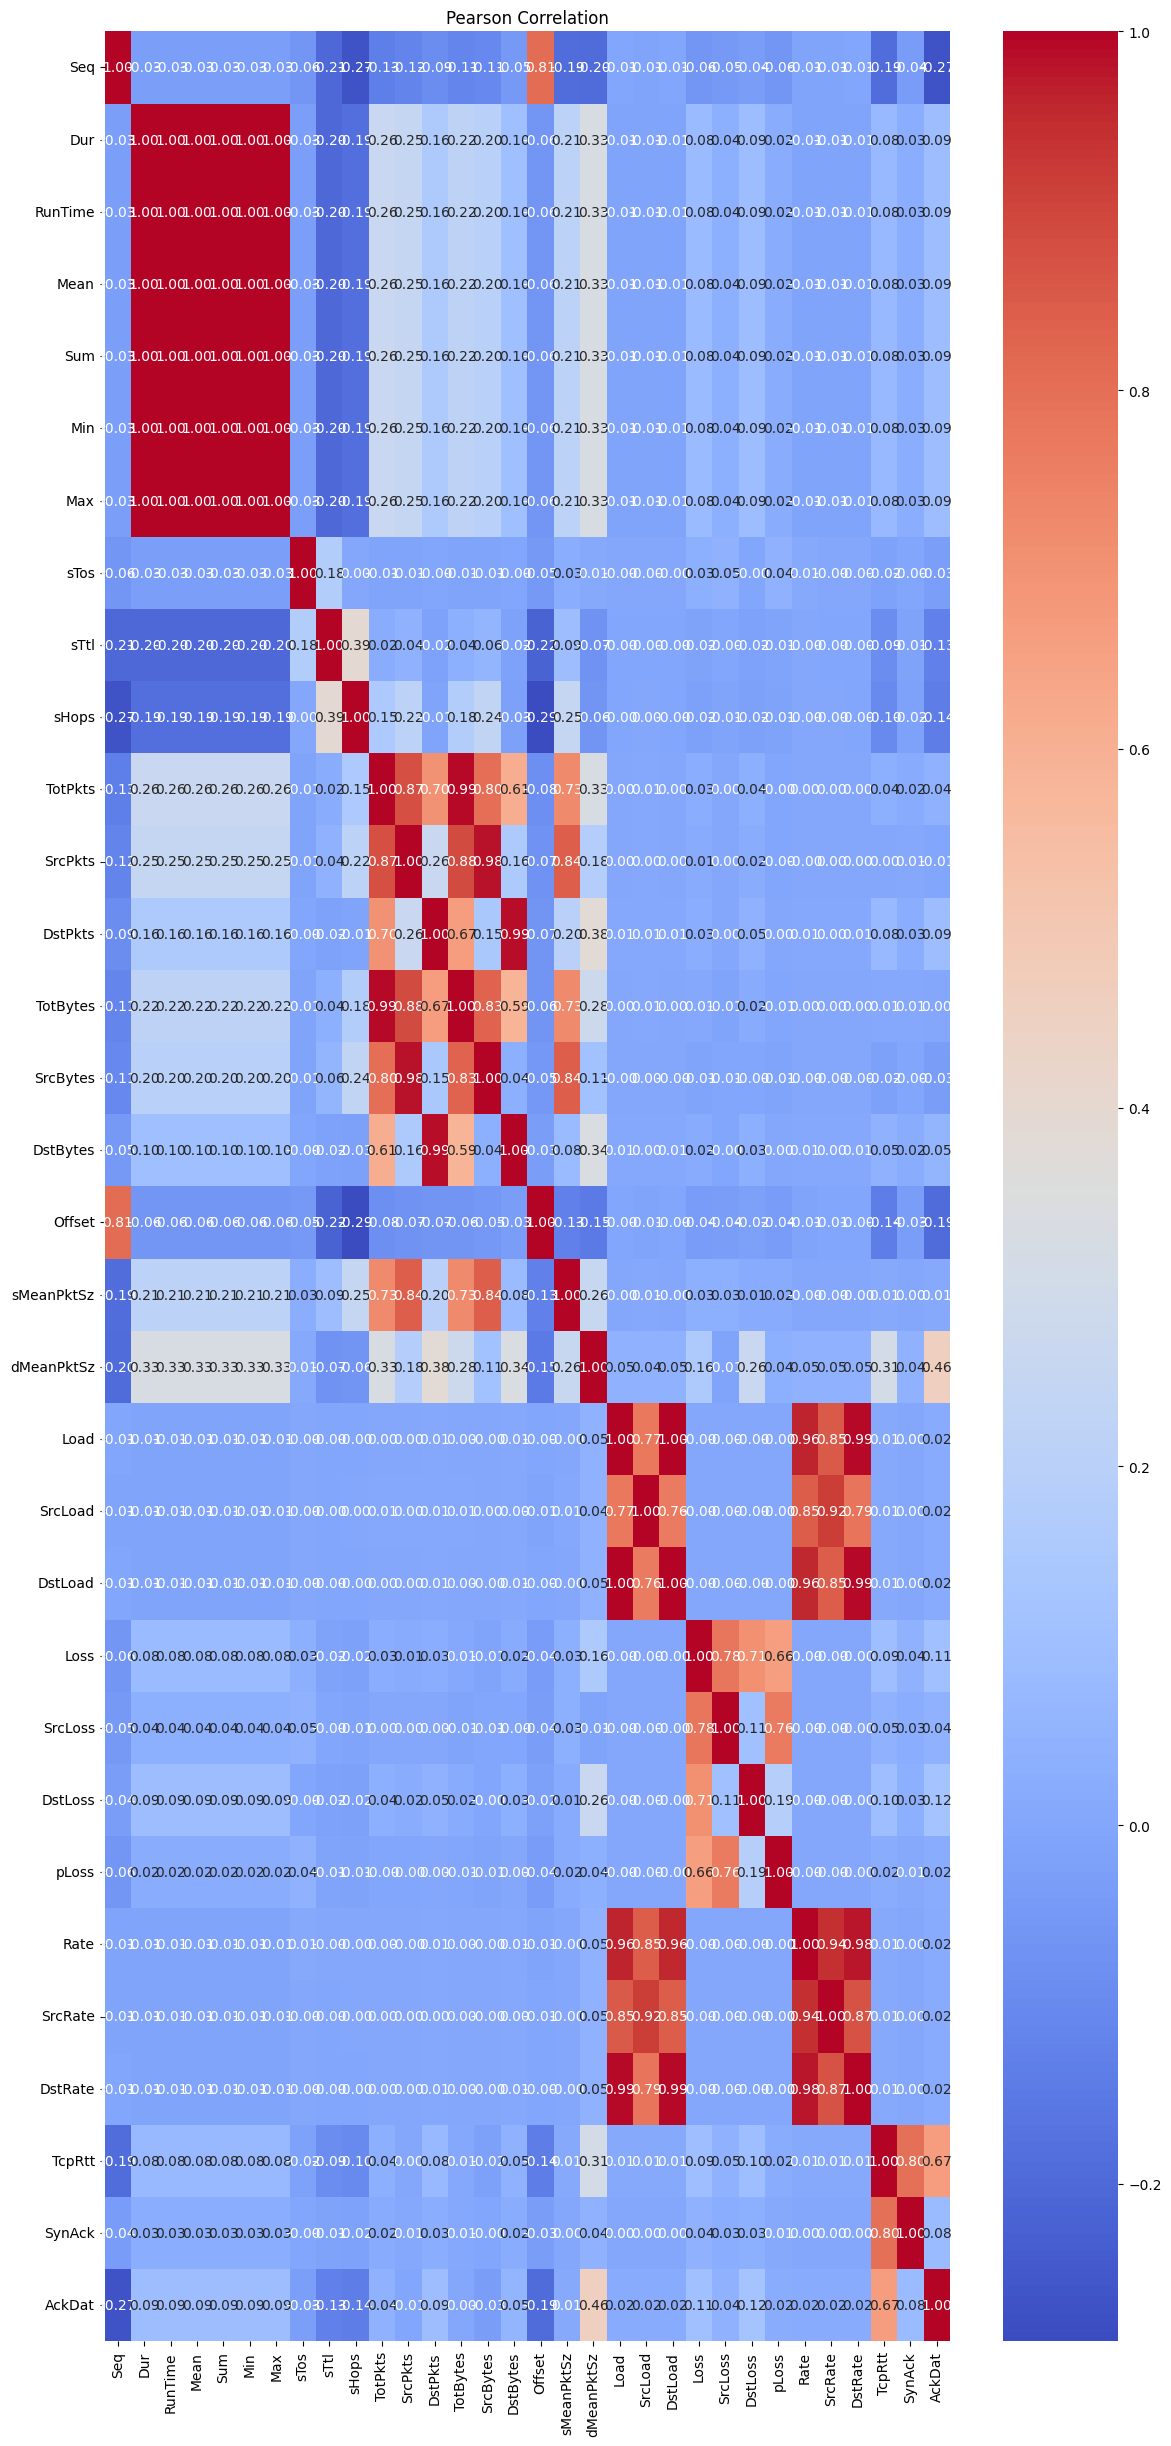

In [81]:
#Plotting heat map
plt.figure(figsize=(30, 30))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.heatmap(pear_cor_int, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Pearson Correlation')

In [50]:
#pearson correlation
pear_cor = X.corr(method = 'pearson')
pear_cor = pd.DataFrame(pear_cor)
pear_cor

,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,sTtl,sHops,...,State_CON,State_ECO,State_FIN,State_INT,State_NRS,State_REQ,State_RSP,State_RST,State_TST,State_URP
Seq,1.000000,-0.028287,-0.028287,-0.028287,-0.028287,-0.028287,-0.028287,-0.060186,-0.205341,-0.266175,...,-0.283619,-0.082622,-0.152881,0.007388,-0.001313,0.351694,-0.008000,-0.184316,-0.004602,-0.008780
Dur,-0.028287,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.028247,-0.204560,-0.185770,...,0.336661,-0.124716,-0.016216,-0.077180,-0.001035,-0.039942,0.001352,-0.114524,-0.002191,-0.018839
RunTime,-0.028287,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.028247,-0.204560,-0.185770,...,0.336661,-0.124716,-0.016216,-0.077180,-0.001035,-0.039942,0.001352,-0.114524,-0.002191,-0.018839
Mean,-0.028287,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.028247,-0.204560,-0.185770,...,0.336661,-0.124716,-0.016216,-0.077180,-0.001035,-0.039942,0.001352,-0.114524,-0.002191,-0.018839
Sum,-0.028287,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.028247,-0.204560,-0.185770,...,0.336661,-0.124716,-0.016216,-0.077180,-0.001035,-0.039942,0.001352,-0.114524,-0.002191,-0.018839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
State_REQ,0.351694,-0.039942,-0.039942,-0.039942,-0.039942,-0.039942,-0.039942,-0.057231,-0.322141,-0.194289,...,-0.338681,-0.151112,-0.219359,-0.590349,-0.001244,1.000000,-0.007515,-0.249829,-0.004654,-0.024665
State_RSP,-0.008000,0.001352,0.001352,0.001352,0.001352,0.001352,0.001352,0.010845,0.005338,0.012546,...,-0.002706,-0.001207,-0.001753,-0.004717,-0.000010,-0.007515,1.000000,-0.001996,-0.000037,-0.000197
State_RST,-0.184316,-0.114524,-0.114524,-0.114524,-0.114524,-0.114524,-0.114524,-0.017786,-0.083661,-0.084973,...,-0.089967,-0.040141,-0.058270,-0.156820,-0.000330,-0.249829,-0.001996,1.000000,-0.001236,-0.006552
State_TST,-0.004602,-0.002191,-0.002191,-0.002191,-0.002191,-0.002191,-0.002191,-0.000331,-0.002986,0.020332,...,-0.001676,-0.000748,-0.001085,-0.002921,-0.000006,-0.004654,-0.000037,-0.001236,1.000000,-0.000122


In [51]:
# Save the Pearson correlation coefficients to a CSV file
pear_cor.to_csv('pearson_correlation.csv', index=True)

In [52]:
# List of columns that are highky corelated
threshold = 0.9

highly_correlated = []

for i in range(len(pear_cor.columns)):
  for j in range(i+1,len(pear_cor.columns)):
    if abs(pear_cor.iloc[i,j]) >= threshold:
      highly_correlated.append((pear_cor.columns[i],pear_cor.columns[j]))


highly_correlated = set([col for pair in highly_correlated for col in pair])

highly_related_column_list = list(highly_correlated)

In [53]:
print(highly_related_column_list)
print(len(highly_related_column_list))

['Cause_Start', 'Rate', 'sDSb_cs0', 'SrcPkts', 'TotPkts', 'sTos', 'State_NRS', 'Proto_ipv6-icmp', 'Max', 'SrcRate', 'State_ECO', 'sDSb_cs6', 'sDSb_ef', 'SrcLoad', 'DstPkts', 'DstRate', 'Cause_Status', 'TotBytes', 'DstLoad', 'Sum', 'RunTime', 'Load', 'Proto_udp', 'Proto_sctp', 'Proto_tcp', 'SrcBytes', 'State_URP', 'Mean', 'Proto_icmp', 'DstBytes', 'Dur', 'Min']
32


In [61]:
#dataframe with highly correlated columns
df_high_corr = X[highly_related_column_list]
df_high_corr['Label'] = df['Label']
df_high_corr

,Cause_Start,Rate,sDSb_cs0,SrcPkts,TotPkts,sTos,State_NRS,Proto_ipv6-icmp,Max,SrcRate,...,Proto_udp,Proto_sctp,Proto_tcp,SrcBytes,State_URP,Mean,Proto_icmp,DstBytes,Dur,Min
0,1.0,0.000000,1.0,1,1,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,98,0.0,0.000000,1.0,0,0.000000,0.000000
1,1.0,0.000000,1.0,1,1,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,98,0.0,0.000000,1.0,0,0.000000,0.000000
2,1.0,42.616875,1.0,196,214,0.0,0.0,0.0,4.998020,39.015450,...,1.0,0.0,0.0,244212,0.0,4.998020,0.0,4881,4.998020,4.998020
3,1.0,36.614376,1.0,163,184,0.0,0.0,0.0,4.998037,32.412727,...,1.0,0.0,0.0,216245,0.0,4.998037,0.0,5467,4.998037,4.998037
4,1.0,44.404858,1.0,204,223,0.0,0.0,0.0,4.999453,40.604443,...,1.0,0.0,0.0,275723,0.0,4.999453,0.0,4493,4.999453,4.999453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215885,0.0,0.000000,0.0,1,2,186.0,0.0,0.0,0.000000,0.000000,...,0.0,1.0,0.0,102,0.0,0.000000,0.0,98,0.000000,0.000000
1215886,0.0,21.221781,0.0,3,6,186.0,0.0,0.0,0.235607,8.488712,...,0.0,1.0,0.0,290,0.0,0.235607,0.0,2766,0.235607,0.235607
1215887,1.0,20.014610,1.0,2,3,0.0,0.0,0.0,0.099927,10.007305,...,0.0,0.0,1.0,160,0.0,0.099927,0.0,92,0.099927,0.099927
1215888,0.0,3.823062,0.0,3,6,186.0,0.0,0.0,1.307852,1.529225,...,0.0,1.0,0.0,306,0.0,1.307852,0.0,290,1.307852,1.307852


Text(0.5, 1.0, 'Pearson Correlation')

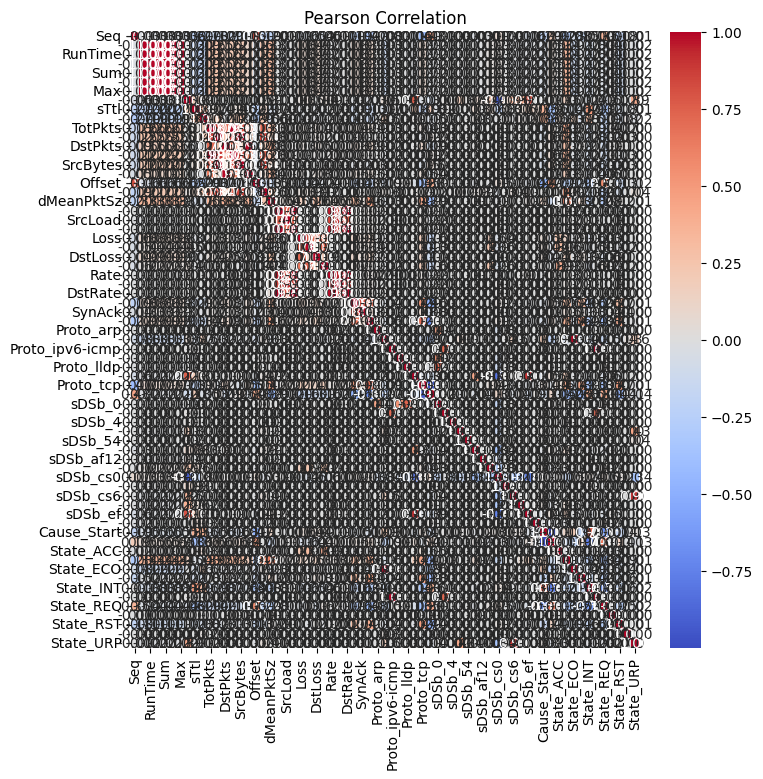

In [84]:
#Plotting heat map
plt.figure(figsize=(18,8))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.heatmap(pear_cor, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Pearson Correlation')

In [62]:
#spearman correlation
spearman_cor = X.corr(method = 'spearman')
spearman_cor = pd.DataFrame(spearman_cor)
spearman_cor

,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,sTtl,sHops,...,State_CON,State_ECO,State_FIN,State_INT,State_NRS,State_REQ,State_RSP,State_RST,State_TST,State_URP
Seq,1.000000,-0.046329,-0.046329,-0.046329,-0.046329,-0.046329,-0.046329,-0.095201,-0.124788,-0.246734,...,-0.353054,-0.115384,-0.145399,0.041436,-0.001945,0.371436,-0.012381,-0.185579,-0.006173,-0.001618
Dur,-0.046329,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.000517,-0.033558,-0.258324,...,0.388747,-0.103682,-0.026698,-0.085441,-0.000511,-0.078948,0.001328,-0.089550,-0.002262,-0.021096
RunTime,-0.046329,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.000517,-0.033558,-0.258324,...,0.388747,-0.103682,-0.026698,-0.085441,-0.000511,-0.078948,0.001328,-0.089550,-0.002262,-0.021096
Mean,-0.046329,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.000517,-0.033558,-0.258324,...,0.388747,-0.103682,-0.026698,-0.085441,-0.000511,-0.078948,0.001328,-0.089550,-0.002262,-0.021096
Sum,-0.046329,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.000517,-0.033558,-0.258324,...,0.388747,-0.103682,-0.026698,-0.085441,-0.000511,-0.078948,0.001328,-0.089550,-0.002262,-0.021096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
State_REQ,0.371436,-0.078948,-0.078948,-0.078948,-0.078948,-0.078948,-0.078948,-0.057045,-0.257452,-0.249851,...,-0.338681,-0.151112,-0.219359,-0.590349,-0.001244,1.000000,-0.007515,-0.249829,-0.004654,-0.024665
State_RSP,-0.012381,0.001328,0.001328,0.001328,0.001328,0.001328,0.001328,0.011111,0.014769,0.009215,...,-0.002706,-0.001207,-0.001753,-0.004717,-0.000010,-0.007515,1.000000,-0.001996,-0.000037,-0.000197
State_RST,-0.185579,-0.089550,-0.089550,-0.089550,-0.089550,-0.089550,-0.089550,-0.018827,-0.032785,-0.101249,...,-0.089967,-0.040141,-0.058270,-0.156820,-0.000330,-0.249829,-0.001996,1.000000,-0.001236,-0.006552
State_TST,-0.006173,-0.002262,-0.002262,-0.002262,-0.002262,-0.002262,-0.002262,-0.000351,-0.011714,0.011688,...,-0.001676,-0.000748,-0.001085,-0.002921,-0.000006,-0.004654,-0.000037,-0.001236,1.000000,-0.000122


In [63]:
# Save the Spearman correlation coefficients to a CSV file
spearman_cor.to_csv('spearman_correlation.csv', index=True)

In [64]:
# List of columns that are highky corelated
threshold = 0.9

highly_correlated_spear = []

for i in range(len(spearman_cor.columns)):
  for j in range(i+1,len(spearman_cor.columns)):
    if abs(spearman_cor.iloc[i,j]) >= threshold:
      highly_correlated_spear.append((spearman_cor.columns[i],spearman_cor.columns[j]))


highly_correlated_spear = set([col for pair in highly_correlated_spear for col in pair])

highly_related_column_list_spear = list(highly_correlated_spear)

In [65]:
print(highly_related_column_list_spear)
print(len(highly_related_column_list_spear))

['Cause_Start', 'Rate', 'SrcPkts', 'sDSb_cs0', 'TotPkts', 'AckDat', 'sTos', 'State_NRS', 'pLoss', 'Proto_ipv6-icmp', 'Max', 'SrcRate', 'State_ECO', 'sDSb_cs6', 'sDSb_ef', 'SrcLoad', 'dMeanPktSz', 'Loss', 'DstPkts', 'DstRate', 'Cause_Status', 'TotBytes', 'DstLoad', 'SynAck', 'Sum', 'RunTime', 'Load', 'Proto_udp', 'Proto_sctp', 'Proto_tcp', 'SrcBytes', 'TcpRtt', 'State_URP', 'Mean', 'Proto_icmp', 'DstBytes', 'Dur', 'Min']
38


In [85]:
#dataframe with highly correlated columns for spearman
df_high_corr_spear = X[highly_related_column_list_spear]
df_high_corr_spear['Label'] = df['Label']
df_high_corr_spear

<ipython-input-85-76c5b412958b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_corr_spear['Label'] = df['Label']


,Cause_Start,Rate,SrcPkts,sDSb_cs0,TotPkts,AckDat,sTos,State_NRS,pLoss,Proto_ipv6-icmp,...,Proto_tcp,SrcBytes,TcpRtt,State_URP,Mean,Proto_icmp,DstBytes,Dur,Min,Label
0,1.0,0.000000,1,1.0,1,0.0,0.0,0.0,0.0,0.0,...,0.0,98,0.0,0.0,0.000000,1.0,0,0.000000,0.000000,Benign
1,1.0,0.000000,1,1.0,1,0.0,0.0,0.0,0.0,0.0,...,0.0,98,0.0,0.0,0.000000,1.0,0,0.000000,0.000000,Benign
2,1.0,42.616875,196,1.0,214,0.0,0.0,0.0,0.0,0.0,...,0.0,244212,0.0,0.0,4.998020,0.0,4881,4.998020,4.998020,Benign
3,1.0,36.614376,163,1.0,184,0.0,0.0,0.0,0.0,0.0,...,0.0,216245,0.0,0.0,4.998037,0.0,5467,4.998037,4.998037,Benign
4,1.0,44.404858,204,1.0,223,0.0,0.0,0.0,0.0,0.0,...,0.0,275723,0.0,0.0,4.999453,0.0,4493,4.999453,4.999453,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215885,0.0,0.000000,1,0.0,2,0.0,186.0,0.0,0.0,0.0,...,0.0,102,0.0,0.0,0.000000,0.0,98,0.000000,0.000000,Benign
1215886,0.0,21.221781,3,0.0,6,0.0,186.0,0.0,0.0,0.0,...,0.0,290,0.0,0.0,0.235607,0.0,2766,0.235607,0.235607,Benign
1215887,1.0,20.014610,2,1.0,3,0.0,0.0,0.0,0.0,0.0,...,1.0,160,0.0,0.0,0.099927,0.0,92,0.099927,0.099927,Benign
1215888,0.0,3.823062,3,0.0,6,0.0,186.0,0.0,0.0,0.0,...,0.0,306,0.0,0.0,1.307852,0.0,290,1.307852,1.307852,Benign


In [86]:
#different columns select by pearson and spear
hashset = set(highly_related_column_list)
list2 = []
for i in highly_related_column_list_spear:
  if i not in hashset:
    list2.append(i)

hashset2 = set(highly_related_column_list_spear)
list1 = []
for i in highly_related_column_list:
  if i not in hashset2:
    list1.append(i)

In [87]:
print(list1)
print(list2)

[]
['AckDat', 'pLoss', 'dMeanPktSz', 'Loss', 'SynAck', 'TcpRtt']


Text(0.5, 1.0, 'Spearman Correlation')

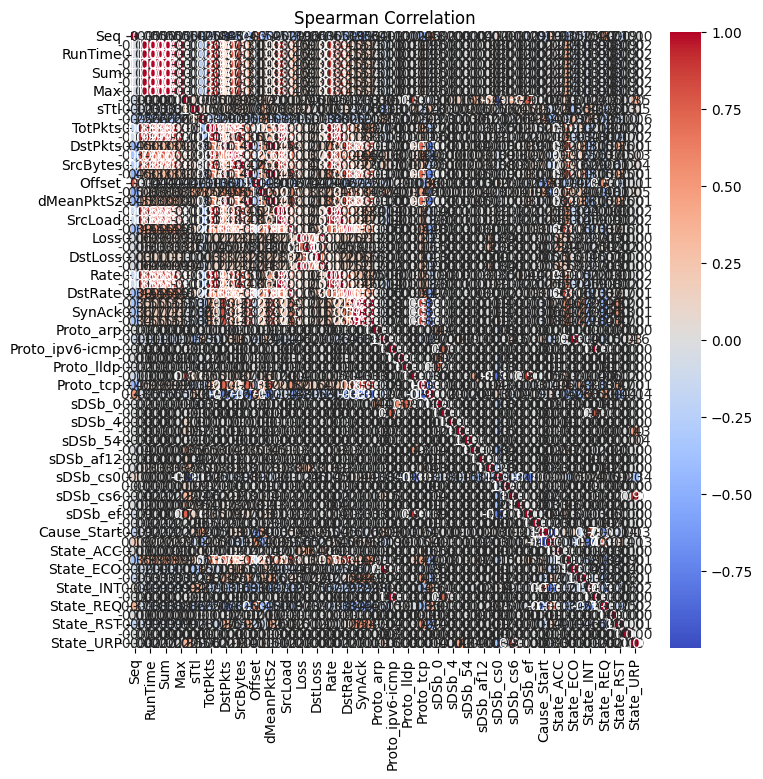

In [88]:
#Plotting heat map
plt.figure(figsize=(18,8))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.heatmap(spearman_cor, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Spearman Correlation')

In [ ]:
#normalization min max scalling
scaler = MinMaxScaler()
scaled = pd.DataFrame(scaler.fit_transform(df_high_corr),columns = df_high_corr.columns)

scaled['Label'] = df['Label']
scaled

,Mean,TotPkts,Load,RunTime,SrcRate,Sum,DstPkts,Dur,Max,SrcPkts,DstBytes,DstLoad,DstRate,SrcLoad,Rate,SrcBytes,Min,TotBytes,Label
0,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.001014,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000073,0.000000,0.000012,Benign
1,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.001014,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000073,0.000000,0.000012,Benign
2,0.250897,0.053303,1.506769e-06,0.250897,7.803090e-06,0.250897,0.005712,0.250897,0.250897,0.198783,0.001072,2.805674e-08,1.308210e-07,6.404829e-05,1.522031e-06,0.181776,0.250897,0.053488,Benign
3,0.250898,0.045796,1.339696e-06,0.250898,6.482545e-06,0.250898,0.006665,0.250898,0.250898,0.165314,0.001201,3.169001e-08,1.539066e-07,5.665439e-05,1.307656e-06,0.160959,0.250898,0.047607,Benign
4,0.250969,0.055556,1.695267e-06,0.250969,8.120889e-06,0.250969,0.006030,0.250969,0.250969,0.206897,0.000987,2.590093e-08,1.384767e-07,7.230620e-05,1.585888e-06,0.205231,0.250969,0.060172,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215885,0.000000,0.000250,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000317,0.000000,0.000000,0.001014,0.000022,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000076,0.000000,0.000034,Benign
1215886,0.011827,0.001251,2.631178e-07,0.011827,1.697742e-06,0.011827,0.000952,0.011827,0.011827,0.003043,0.000608,2.380713e-07,3.264889e-07,1.084855e-06,7.579207e-07,0.000216,0.011827,0.000647,Benign
1215887,0.005016,0.000501,2.435238e-08,0.005016,2.001461e-06,0.005016,0.000317,0.005016,0.005016,0.002028,0.000020,0.000000e+00,0.000000e+00,1.054788e-06,7.148075e-07,0.000119,0.005016,0.000045,Benign
1215888,0.065653,0.001251,9.256753e-09,0.065653,3.058450e-07,0.065653,0.000952,0.065653,0.065653,0.003043,0.000064,4.512086e-09,5.881635e-08,2.055085e-07,1.365379e-07,0.000228,0.065653,0.000119,Benign


In [ ]:
#feature selection using random forest


In [ ]:
#Implementing xgboost with 1000 and 10000 Data points
df_1000
df_10000

In [ ]:
#seprating target variable from the data set
X = df_1000.copy()
X.drop(columns = 'Label',inplace = True)
y = df_1000[['Label']]

In [ ]:
X.drop(columns = 'Attack Type',inplace = True)
X.drop (columns = 'Attack Tool',inplace = True)

In [ ]:
#Categorical variables
cat = [key for key in dict(X.dtypes)
        if dict(X.dtypes)[key] in ['object']]
print(cat)

['Proto', 'sDSb', 'Cause', 'State']


In [ ]:
X[cat] = X[cat].astype(str)
ohe = OneHotEncoder(handle_unknown='ignore')
Xcat = pd.DataFrame(ohe.fit_transform(X[cat]).toarray(),columns=ohe.get_feature_names_out(),index=X.index)
X = pd.concat([X,Xcat],axis=1)
X.drop(labels=cat,axis=1,inplace=True)
X.sample(5)


,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,sTtl,sHops,...,sDSb_ef,Cause_Start,Cause_Status,State_CON,State_ECO,State_FIN,State_INT,State_REQ,State_RST,State_TST
65,4210,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,58.0,6.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
749,57,0.001547,0.001547,0.001547,0.001547,0.001547,0.001547,0.0,45.0,19.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
138,11,2.996247,2.996247,2.996247,2.996247,2.996247,2.996247,136.0,255.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
556,66,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,48.0,16.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,2113,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,58.0,6.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Label encoder
from sklearn.preprocessing import LabelEncoder

label  = LabelEncoder()
y = label.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
#Implementing XGBoost
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = xgb_model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Benign','Malicious']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00       159
   Malicious       1.00      1.00      1.00       171

    accuracy                           1.00       330
   macro avg       1.00      1.00      1.00       330
weighted avg       1.00      1.00      1.00       330

